In [1]:
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt
import re
import scipy
from sklearn.datasets import make_blobs
import random
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('../Data/iris_test_data.txt', names=["s_length", "s_width", "p_length", "p_width"], delim_whitespace=True)
df.head()

,s_length,s_width,p_length,p_width
0,5.7,4.4,1.5,0.4
1,5.5,4.2,1.4,0.2
2,5.2,4.1,1.5,0.1
3,5.8,4.0,1.2,0.2
4,5.4,3.9,1.7,0.4


In [3]:
# Change df to a numpy matrix
data = df.values[:, 0:4]
data

array([[5.7, 4.4, 1.5, 0.4],
       [5.5, 4.2, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [7.7, 3.8, 6.7, 2.2],
       [7.9, 3.8, 6.4, 2. ],
       [5.1, 3.8, 1.9, 0.4],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [5.1, 3.7, 1.5, 0.4],
       [5.4, 3.7, 1.5, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [7.2, 3.6, 6.1, 2.5],
       [5. , 3.6, 1.4, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.2, 3.5, 1.5, 0.2],
       [5.1, 3.5, 1.4, 0.3],
       [5.1, 3.5, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.5, 3.5, 1.3, 0.2],
       [6.3, 3.4, 5.6, 2.4],
       [6.2, 3.4, 5.4, 2.3],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.4, 1.9, 0.2],
       [5.4, 3.4, 1.7, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [4.8, 3.4, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.1, 3.4, 1.5, 0.2],
       [5. , 3.4, 1.5, 0.2],
       [4.6, 3

In [4]:
# Number of clusters
k = 3
# Amount of training data
n = data.shape[0]
# Number of features 
c = data.shape[1]
# Target values
t = [1,2,3]

In [5]:
#data = df.values.tolist()
print(data)

[[5.7 4.4 1.5 0.4]
 [5.5 4.2 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [5.8 4.  1.2 0.2]
 [5.4 3.9 1.7 0.4]
 [5.4 3.9 1.3 0.4]
 [7.7 3.8 6.7 2.2]
 [7.9 3.8 6.4 2. ]
 [5.1 3.8 1.9 0.4]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.6 0.2]
 [5.1 3.8 1.5 0.3]
 [5.1 3.7 1.5 0.4]
 [5.4 3.7 1.5 0.2]
 [5.3 3.7 1.5 0.2]
 [7.2 3.6 6.1 2.5]
 [5.  3.6 1.4 0.2]
 [4.6 3.6 1.  0.2]
 [5.  3.5 1.6 0.6]
 [5.2 3.5 1.5 0.2]
 [5.1 3.5 1.4 0.3]
 [5.1 3.5 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.5 3.5 1.3 0.2]
 [6.3 3.4 5.6 2.4]
 [6.2 3.4 5.4 2.3]
 [6.  3.4 4.5 1.6]
 [4.8 3.4 1.9 0.2]
 [5.4 3.4 1.7 0.2]
 [5.  3.4 1.6 0.4]
 [4.8 3.4 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.1 3.4 1.5 0.2]
 [5.  3.4 1.5 0.2]
 [4.6 3.4 1.4 0.3]
 [5.2 3.4 1.4 0.2]
 [6.3 3.3 6.  2.5]
 [6.7 3.3 5.7 2.5]
 [6.7 3.3 5.7 2.1]
 [6.3 3.3 4.7 1.6]
 [5.1 3.3 1.7 0.5]
 [5.  3.3 1.4 0.2]
 [7.2 3.2 6.  1.8]
 [6.8 3.2 5.9 2.3]
 [6.9 3.2 5.7 2.3]
 [6.4 3.2 5.3 2.3]
 [6.5 3.2 5.1 2. ]
 [5.9 3.2 4.8 1.8]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [4.7 3.2 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [4.7 3.2 1.

In [20]:
# Generate random centers, here I will use sigma and mean to make sure it represents all the
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean
centers

array([[5.65541644, 2.9811765 , 2.8391326 , 2.74508536],
       [5.20191468, 3.81252592, 3.08123398, 1.1805954 ],
       [6.58464928, 3.0068626 , 2.69078029, 0.2711143 ]])

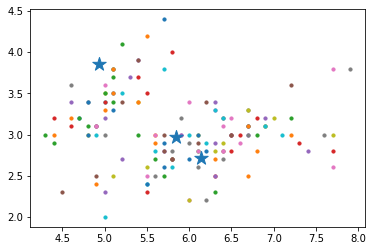

In [7]:
# I will now plot the data and the generated reandom centers, im not sure why its so colorful
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=10)
plt.scatter(centers[:,0], centers[:,1], marker='*',s=200)

In [23]:
# Now I will try to implement K-means clustering and some helper methods
#data = df.values.tolist()
print(data)

[[5.7 4.4 1.5 0.4]
 [5.5 4.2 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [5.8 4.  1.2 0.2]
 [5.4 3.9 1.7 0.4]
 [5.4 3.9 1.3 0.4]
 [7.7 3.8 6.7 2.2]
 [7.9 3.8 6.4 2. ]
 [5.1 3.8 1.9 0.4]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.6 0.2]
 [5.1 3.8 1.5 0.3]
 [5.1 3.7 1.5 0.4]
 [5.4 3.7 1.5 0.2]
 [5.3 3.7 1.5 0.2]
 [7.2 3.6 6.1 2.5]
 [5.  3.6 1.4 0.2]
 [4.6 3.6 1.  0.2]
 [5.  3.5 1.6 0.6]
 [5.2 3.5 1.5 0.2]
 [5.1 3.5 1.4 0.3]
 [5.1 3.5 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.5 3.5 1.3 0.2]
 [6.3 3.4 5.6 2.4]
 [6.2 3.4 5.4 2.3]
 [6.  3.4 4.5 1.6]
 [4.8 3.4 1.9 0.2]
 [5.4 3.4 1.7 0.2]
 [5.  3.4 1.6 0.4]
 [4.8 3.4 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.1 3.4 1.5 0.2]
 [5.  3.4 1.5 0.2]
 [4.6 3.4 1.4 0.3]
 [5.2 3.4 1.4 0.2]
 [6.3 3.3 6.  2.5]
 [6.7 3.3 5.7 2.5]
 [6.7 3.3 5.7 2.1]
 [6.3 3.3 4.7 1.6]
 [5.1 3.3 1.7 0.5]
 [5.  3.3 1.4 0.2]
 [7.2 3.2 6.  1.8]
 [6.8 3.2 5.9 2.3]
 [6.9 3.2 5.7 2.3]
 [6.4 3.2 5.3 2.3]
 [6.5 3.2 5.1 2. ]
 [5.9 3.2 4.8 1.8]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [4.7 3.2 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [4.7 3.2 1.

In [9]:
def init_centroids(k, X):
    arr = []
    for i in range(k):
        cx1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
        cx2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
        arr.append([cx1, cx2])
    return np.asarray(arr)

In [10]:
def dist(a, b):
       return np.sqrt(sum(np.square(a-b)))

In [11]:

def assign_cluster(k, X, cg):
    cluster = [-1]*len(X)
    for i in range(len(X)):
        dist_arr = []
        for j in range(k):
            dist_arr.append(dist(X[i], cg[j]))
        idx = np.argmin(dist_arr)
        cluster[i] = idx
    return np.asarray(cluster)

In [12]:
def compute_centroids(k, X, cluster):
    cg_arr = []
    for i in range(k):
        arr = []
        for j in range(len(X)):
            if cluster[j]==i:
                arr.append(X[j])
        cg_arr.append(np.mean(arr, axis=0))
    return np.asarray(cg_arr)

In [13]:

def measure_change(cg_prev, cg_new):
    res = 0
    for a,b in zip(cg_prev,cg_new):
        res+=dist(a,b)
    return res

In [21]:
def show_clusters(X, cluster, cg):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
    colors = {0:'blue', 1:'orange', 2:'green'}
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(cg[:, 0], cg[:, 1], marker='*', s=150, c='red')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.show()

In [22]:
def k_means(k, X):
    cg_prev = init_centroids(k, X)
    cluster = [0]*len(X)
    cg_change = 100
    while cg_change>.001:
        cluster = assign_cluster(k, X, cg_prev)
        show_clusters(X, cluster, cg_prev)
        cg_new = compute_centroids(k, X, cluster)
        cg_change = measure_change(cg_new, cg_prev)
        cg_prev = cg_new
    return cluster

model = k_means(3,data)

ValueError: operands could not be broadcast together with shapes (4,) (2,) 